# Capstone 3: Identyfing factors that drive Wish Commissions. 

The dataset comes from Kaggle: “Sales of summer clothes in E-commerce Wish” retrieved from https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish.
This dataset includes 1573 observations and 43 features. Data was taken from August 2020.

This e-commerce employs browsing technologies and eliminate distributor fees for the sellers as they provide a platform to sell directly to customers. Wish is interested in looking into factors that drive sales and advertisement as they charges its merchants a fee for each sell and product boost campaing.

For the rest of variables will be delivered a complete EDA notebook. This will provide a useful resource to analyze metrics like units sold, countries shipped to, origin country and so on. Besides, sales and units sold are analyzed to find correlations with quality variables, product and merchant ratings. Let's do it!

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

## Import Modules

In [2]:
# import & alias modules
import math
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as stests
sns.set()
sns.set_style("white")

## Bringing in the Dataset

In [3]:
#read in data in https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish
#df_wish = pd.read_csv('/content/gdrive/My Drive/Thinkful Data Analytics/Capstone 3/wish-summer.csv')
df_wish = pd.read_csv('wish-summer.csv')
df_wish.info() # see the information for our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

## Making an adding calculation for sales

In [4]:
df_wish=df_wish.assign(sales=(df_wish.price*df_wish.units_sold))
df_wish.head(5)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,sales
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08,1600.0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,160000.0
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,800.0
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08,40000.0
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08,272.0


## Identifying most promising variables for our study 

In [5]:
df=df_wish.drop(['title_orig','currency_buyer','rating_five_count','rating_four_count','rating_three_count','rating_two_count',
                 'rating_one_count','tags','product_variation_inventory','shipping_option_name', 'inventory_total',
                'merchant_title','merchant_name','merchant_info_subtitle','merchant_id','merchant_profile_picture','has_urgency_banner',
                'urgency_text','product_url','product_picture','product_id','theme','crawl_month'], axis=1)

## Eliminating null values from my dataset (70 rows)

In [6]:
df=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)] #row wise
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 1572
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1503 non-null   object 
 1   price                         1503 non-null   float64
 2   retail_price                  1503 non-null   int64  
 3   units_sold                    1503 non-null   int64  
 4   uses_ad_boosts                1503 non-null   int64  
 5   rating                        1503 non-null   float64
 6   rating_count                  1503 non-null   int64  
 7   badges_count                  1503 non-null   int64  
 8   badge_local_product           1503 non-null   int64  
 9   badge_product_quality         1503 non-null   int64  
 10  badge_fast_shipping           1503 non-null   int64  
 11  product_color                 1503 non-null   object 
 12  product_variation_size_id     1503 non-null   object 
 13  shi

In [7]:
# Checking for rows with a null in any column
null_rows = df[df.isnull().any(axis=1)]

print("There are {} rows with a null out of {} rows in the dataset".format(len(null_rows),len(df)))
null_rows.head(10)
null_rows.info()

There are 0 rows with a null out of 1503 rows in the dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         0 non-null      object 
 1   price                         0 non-null      float64
 2   retail_price                  0 non-null      int64  
 3   units_sold                    0 non-null      int64  
 4   uses_ad_boosts                0 non-null      int64  
 5   rating                        0 non-null      float64
 6   rating_count                  0 non-null      int64  
 7   badges_count                  0 non-null      int64  
 8   badge_local_product           0 non-null      int64  
 9   badge_product_quality         0 non-null      int64  
 10  badge_fast_shipping           0 non-null      int64  
 11  product_color                 0 non-null      object 
 12  product_variati

## Assigning columns according to variable type

In [8]:
#continuous variables
cont_vars=df[['price','retail_price','rating','shipping_option_price','merchant_rating','sales']]
#discrete variable
disc_vars=df[['units_sold','rating_count','badges_count','countries_shipped_to','merchant_rating_count']]
#nominal variable
nominal_vars=df[['product_color','product_variation_size_id','origin_country']]
#binary variable
binary_vars=df[['uses_ad_boosts','badge_local_product','badge_product_quality','badge_fast_shipping','shipping_is_express','merchant_has_profile_picture']]
#numerical variables
df_num=pd.concat([cont_vars,disc_vars],axis=1)

## Descriptive Statistics on Numerical Variables

In [9]:
cont_vars.describe()

,price,retail_price,rating,shipping_option_price,merchant_rating,sales
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,8.340739,23.403194,3.813992,2.340652,4.026932,34416.420725
std,3.871254,30.625652,0.516527,1.003186,0.202674,70231.659252
min,1.000000,1.000000,1.000000,1.000000,2.333333,2.720000
25%,5.840000,7.000000,3.530000,2.000000,3.916933,800.000000
50%,8.000000,10.000000,3.850000,2.000000,4.038734,7000.000000
75%,11.000000,26.000000,4.110000,3.000000,4.155156,40000.000000
max,49.000000,252.000000,5.000000,12.000000,5.000000,800000.000000


In [10]:
disc_vars.describe()

,units_sold,rating_count,badges_count,countries_shipped_to,merchant_rating_count
count,1503.000000,1503.000000,1503.000000,1503.000000,1.503000e+03
mean,4208.165669,859.487691,0.098470,40.210246,2.372150e+04
std,8929.034430,1904.513648,0.321683,20.006483,6.944847e+04
min,1.000000,0.000000,0.000000,6.000000,0.000000e+00
25%,100.000000,23.000000,0.000000,31.000000,1.765500e+03
50%,1000.000000,149.000000,0.000000,40.000000,7.740000e+03
75%,5000.000000,845.000000,0.000000,43.000000,2.271100e+04
max,100000.000000,20744.000000,2.000000,140.000000,2.174765e+06


## Exploratory Analysis (EDA)

### EDA (Histogram)

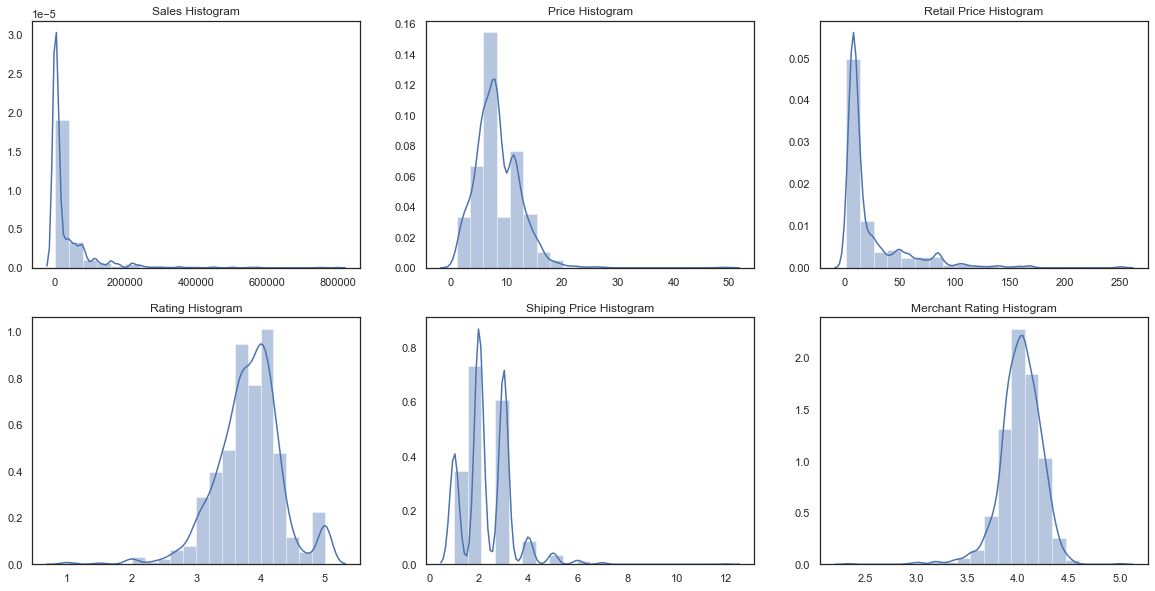

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1) #numb of row, num of colum, 
sns.distplot(df['sales'],bins=20,axlabel=False)
plt.title('Sales Histogram')
plt.subplot(2,3,2)
sns.distplot(df['price'],bins=20,axlabel=False)
plt.title('Price Histogram')
plt.subplot(2,3,3)
sns.distplot(df['retail_price'],bins=20,axlabel=False)
plt.title('Retail Price Histogram')
plt.subplot(2,3,4)
sns.distplot(df['rating'],bins=20,axlabel=False)
plt.title('Rating Histogram')
plt.subplot(2,3,5)
sns.distplot(df['shipping_option_price'],bins=20,axlabel=False)
plt.title('Shiping Price Histogram')
plt.subplot(2,3,6)
sns.distplot(df['merchant_rating'],bins=20,axlabel=False)
plt.title('Merchant Rating Histogram')
plt.show()

### *Most of these variables show a normal distribution, so a t-test will deliver meaningful outcomes.*

### EDA (Continuous vs. nominal variables)

In [103]:
df1=df.groupby('origin_country')['sales'].sum().sort_values(ascending=False)
df2=df.groupby('product_color')['sales'].sum().sort_values(ascending=False)
df3=df.groupby('product_variation_size_id')['sales'].sum().sort_values(ascending=False)
sns.set(font_scale=1.5)
sns.set_style("white")

/Users/mjcobosf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  import sys
/Users/mjcobosf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


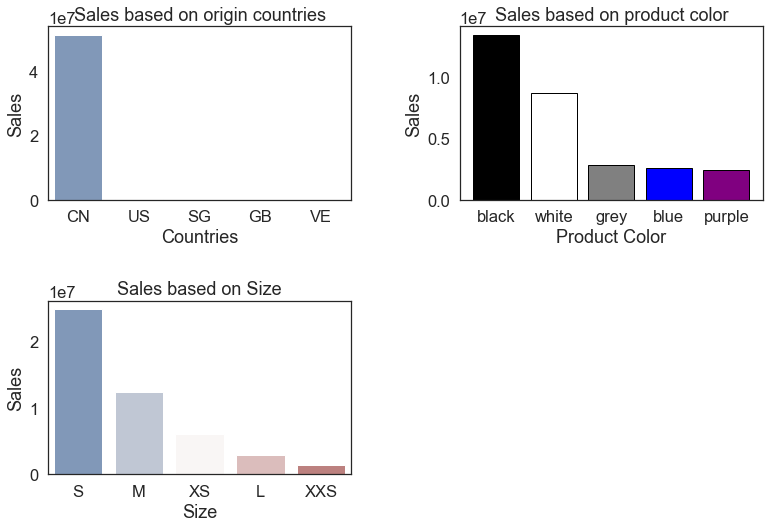

/Users/mjcobosf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


<Figure size 432x288 with 0 Axes>

In [113]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1) #numb of row, num of colum, 
sns.barplot(df1[:5,].index,df1[:5,], palette="vlag")
plt.title('Sales based on origin countries')
plt.xlabel('Countries')
plt.ylabel('Sales')
plt.tight_layout(3.0)
plt.subplot(2,2,2)
plt.bar(df2[:5,].index,df2[:5,], color=['black', 'white', 'grey', 'blue','purple'],edgecolor='black')
plt.title('Sales based on product color')
plt.xlabel('Product Color')
plt.ylabel('Sales')
plt.tight_layout(3.0)
plt.subplot(2,2,3)
sns.barplot(df3[:5,].index,df3[:5,],palette="vlag")
plt.title('Sales based on Size')
plt.xlabel('Size')
plt.ylabel('Sales')
plt.show()
plt.tight_layout(3.0)

### *Merchants are from China, and buyers buy black products in small size.*

In [93]:
df1=df.groupby('origin_country')['rating'].sum().sort_values(ascending=False)
df2=df.groupby('product_color')['rating'].sum().sort_values(ascending=False)
df3=df.groupby('product_variation_size_id')['rating'].sum().sort_values(ascending=False)

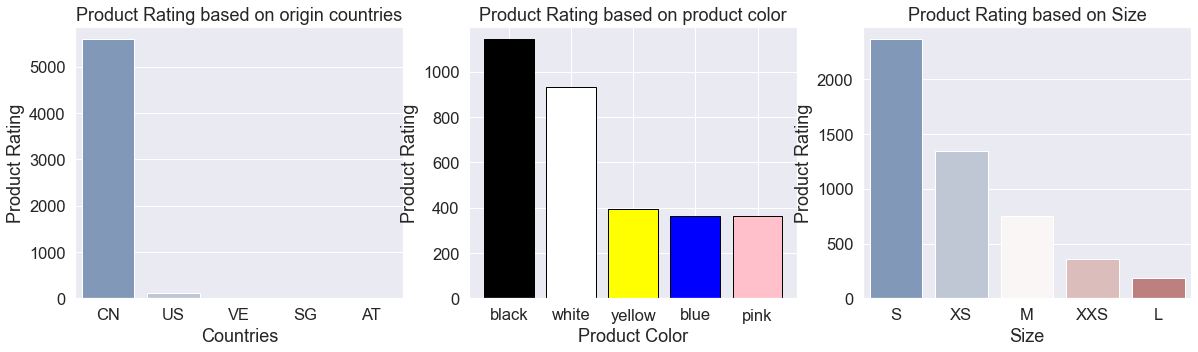

In [94]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1) #numb of row, num of colum, 
sns.barplot(df1[:5,].index,df1[:5,], palette="vlag")
plt.title('Product Rating based on origin countries')
plt.xlabel('Countries')
plt.ylabel('Product Rating')
plt.subplot(1,3,2)
plt.bar(df2[:5,].index,df2[:5,], color=['black', 'white', 'yellow', 'blue', 'pink'],edgecolor='black')
plt.title('Product Rating based on product color')
plt.xlabel('Product Color')
plt.ylabel('Product Rating')
plt.subplot(1,3,3)
sns.barplot(df3[:5,].index,df3[:5,],palette="vlag")
plt.title('Product Rating based on Size')
plt.xlabel('Size')
plt.ylabel('Product Rating')
plt.show()

In [95]:
df1=df.groupby('origin_country')['price'].sum().sort_values(ascending=False)
df2=df.groupby('product_color')['price'].sum().sort_values(ascending=False)
df3=df.groupby('product_variation_size_id')['price'].sum().sort_values(ascending=False)

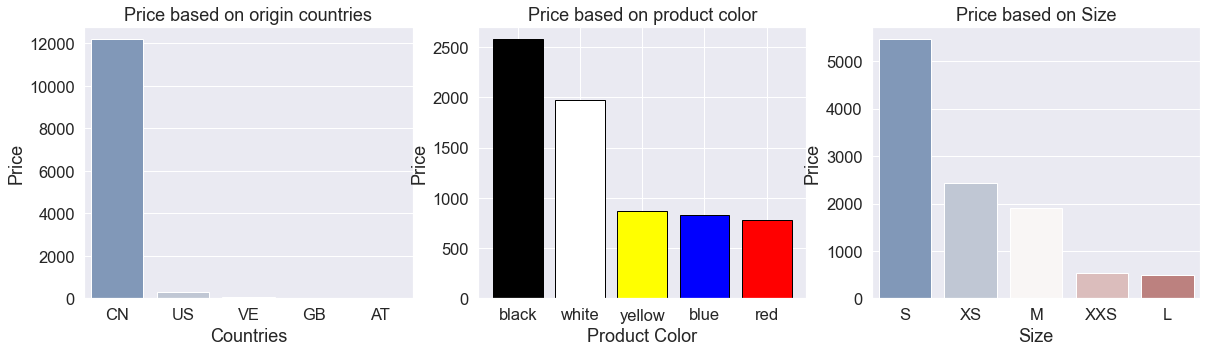

In [96]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1) #numb of row, num of colum, 
sns.barplot(df1[:5,].index,df1[:5,], palette="vlag")
plt.title('Price based on origin countries')
plt.xlabel('Countries')
plt.ylabel('Price')
plt.subplot(1,3,2)
plt.bar(df2[:5,].index,df2[:5,], color=['black', 'white', 'yellow', 'blue', 'red'],edgecolor='black')
plt.title('Price based on product color')
plt.xlabel('Product Color')
plt.ylabel('Price')
plt.subplot(1,3,3)
sns.barplot(df3[:5,].index,df3[:5,],palette="vlag")
plt.title('Price based on Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

### EDA (Discrete vs. nominal variables)

In [97]:
df1=df.groupby('origin_country')['units_sold'].sum().sort_values(ascending=False)
df2=df.groupby('product_color')['units_sold'].sum().sort_values(ascending=False)
df3=df.groupby('product_variation_size_id')['units_sold'].sum().sort_values(ascending=False)

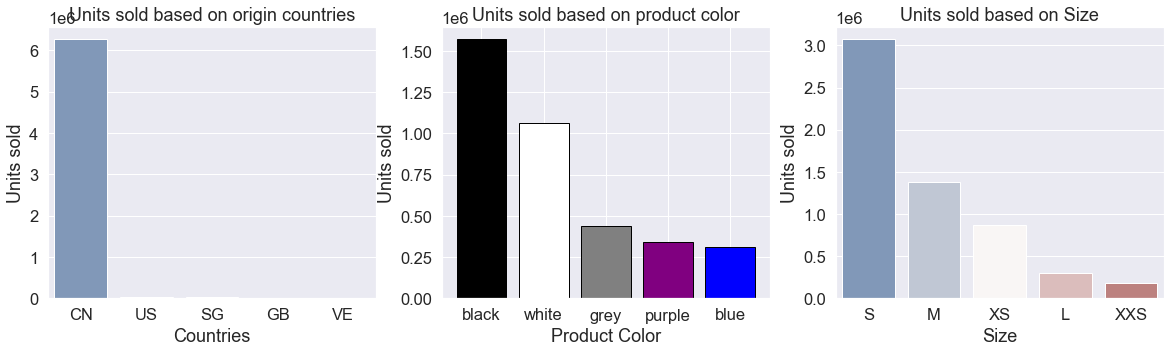

In [98]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1) #numb of row, num of colum, 
sns.barplot(df1[:5,].index,df1[:5,], palette="vlag")
plt.title('Units sold based on origin countries')
plt.xlabel('Countries')
plt.ylabel('Units sold')
plt.subplot(1,3,2)
plt.bar(df2[:5,].index,df2[:5,], color=['black', 'white', 'grey', 'purple', 'blue'],edgecolor='black')
plt.title('Units sold based on product color')
plt.xlabel('Product Color')
plt.ylabel('Units sold')
plt.subplot(1,3,3)
sns.barplot(df3[:5,].index,df3[:5,],palette="vlag")
plt.title('Units sold based on Size')
plt.xlabel('Size')
plt.ylabel('Units sold')
plt.show()

In [99]:
df1=df.groupby('origin_country')['rating_count'].sum().sort_values(ascending=False)
df2=df.groupby('product_color')['rating_count'].sum().sort_values(ascending=False)
df3=df.groupby('product_variation_size_id')['rating_count'].sum().sort_values(ascending=False)

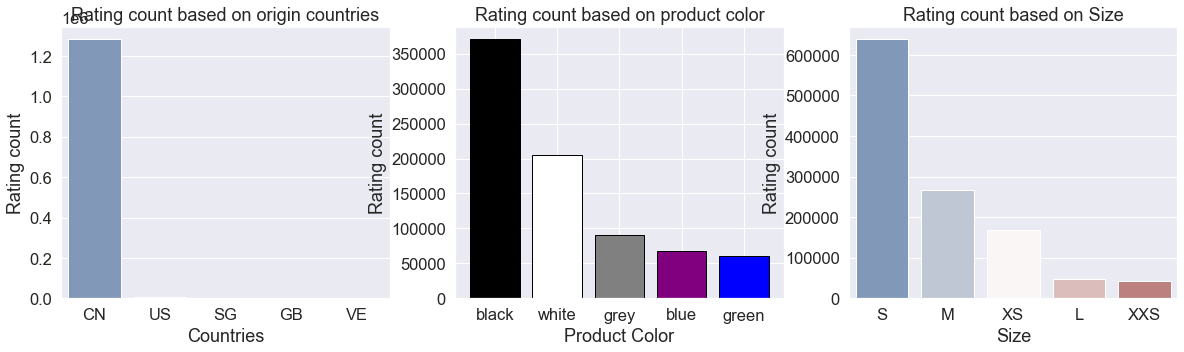

In [100]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1) #numb of row, num of colum, 
sns.barplot(df1[:5,].index,df1[:5,], palette="vlag")
plt.title('Rating count based on origin countries')
plt.xlabel('Countries')
plt.ylabel('Rating count')
plt.subplot(1,3,2)
plt.bar(df2[:5,].index,df2[:5,], color=['black', 'white', 'grey', 'purple', 'blue'],edgecolor='black')
plt.title('Rating count based on product color')
plt.xlabel('Product Color')
plt.ylabel('Rating count')
plt.subplot(1,3,3)
sns.barplot(df3[:5,].index,df3[:5,],palette="vlag")
plt.title('Rating count based on Size')
plt.xlabel('Size')
plt.ylabel('Rating count')
plt.show()

In [101]:
df1=df.groupby('origin_country')['countries_shipped_to'].sum().sort_values(ascending=False)
df2=df.groupby('product_color')['countries_shipped_to'].sum().sort_values(ascending=False)
df3=df.groupby('product_variation_size_id')['countries_shipped_to'].sum().sort_values(ascending=False)

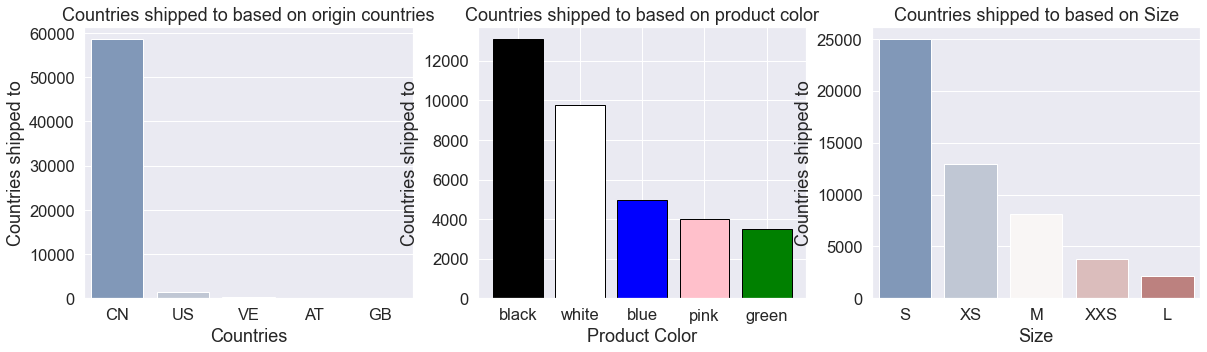

In [102]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1) #numb of row, num of colum, 
sns.barplot(df1[:5,].index,df1[:5,], palette="vlag")
plt.title('Countries shipped to based on origin countries')
plt.xlabel('Countries')
plt.ylabel('Countries shipped to')
plt.subplot(1,3,2)
plt.bar(df2[:5,].index,df2[:5,], color=['black', 'white', 'blue', 'pink', 'green'],edgecolor='black')
plt.title('Countries shipped to based on product color')
plt.xlabel('Product Color')
plt.ylabel('Countries shipped to')
plt.subplot(1,3,3)
sns.barplot(df3[:5,].index,df3[:5,],palette="vlag")
plt.title('Countries shipped to based on Size')
plt.xlabel('Size')
plt.ylabel('Countries shipped to')
plt.show()

## Checking for correlation between numerical features

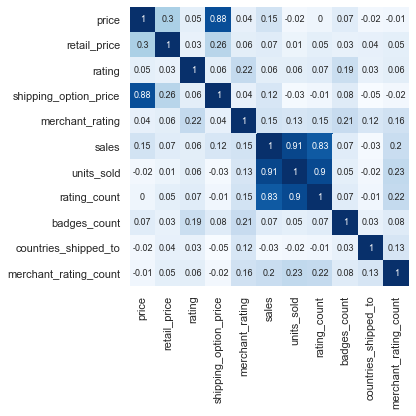

In [24]:
corr_df = df_num.iloc[:, :].corr().round(2) # rounding to 1 decimal point to make it easier to observe correlated features
plt.figure(figsize=(5, 10))
#sns.heatmap(corr_df, cmap='coolwarm', annot=True, square=True, annot_kws=dict(size=9), cbar=False)
sns.heatmap(corr_df, cmap='Blues',annot=True, square=True, annot_kws=dict(size=9), cbar=False)
plt.show()

### *Given the results of our Pearson r test for numerical variables, we can conclude there is a statistically significant relationship between units sold and sales. Besides, rating count shows a strong correlation with sales.*

## Checking for correlation between Sales and numerical features with scatter plots

In [25]:
sns.set_style("white")
y=df_num.sales
x = df_num.drop(['sales'], axis=1)

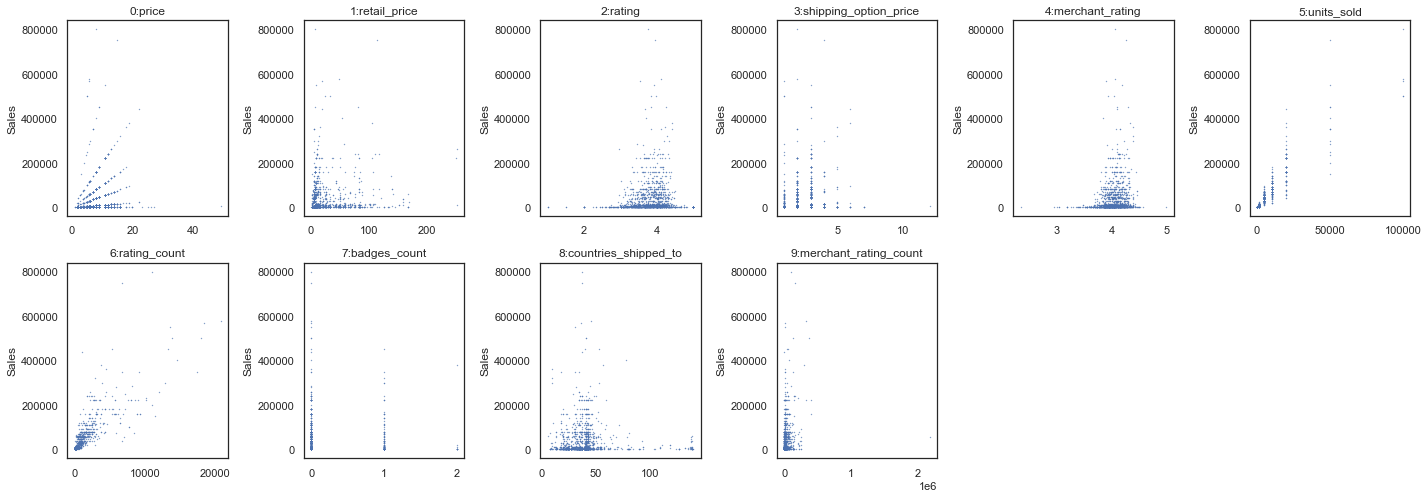

In [26]:
fig, axes = plt.subplots(3,6,figsize=(20,10))
for i, ax in enumerate (axes.ravel()):
    if i>9:
        ax.set_visible(False)
        continue
    X_col=x.iloc[:,i]
    ax.scatter(X_col,y, s=0.1)
    ax.set_ylabel("Sales")
    ax.set_title("{}:{}".format(i,x.columns[i]))
plt.tight_layout()

### *Given the results of the scatter plot, promising variables to predict a sales behaviour are product rating count and units sold.*


## Checking for correlation between Product Ratings and Numerical Features with scatter plots

In [27]:
y=df_num.rating
x = df_num.drop(['rating'], axis=1)

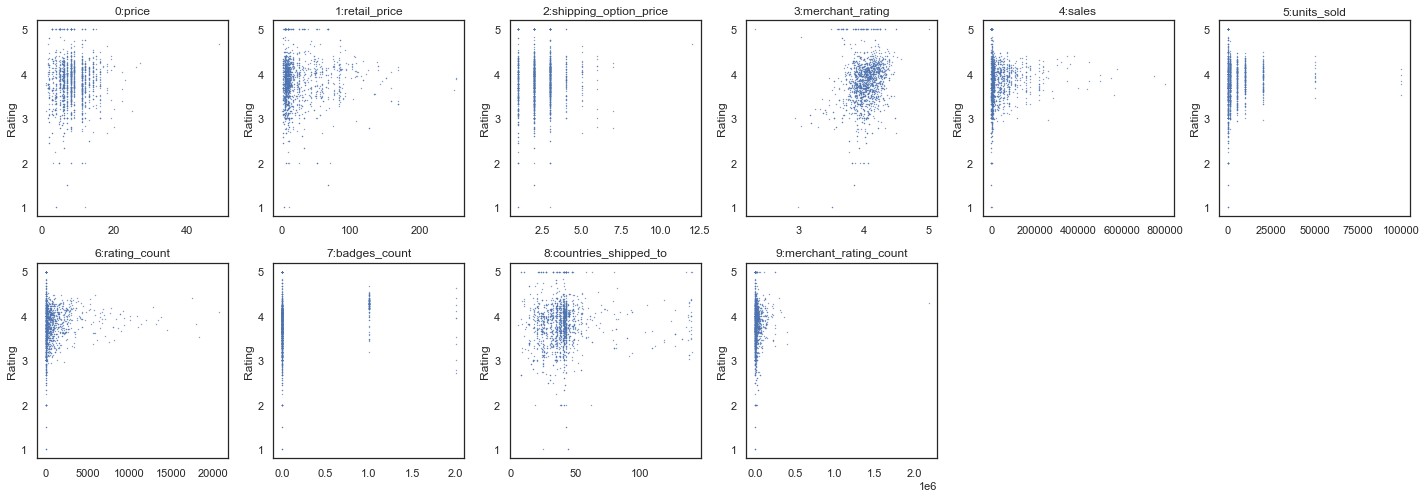

In [28]:
fig, axes = plt.subplots(3,6,figsize=(20,10))
for i, ax in enumerate (axes.ravel()):
    if i>9:
        ax.set_visible(False)
        continue
    X_col=x.iloc[:,i]
    ax.scatter(X_col,y, s=0.1)
    ax.set_ylabel("Rating")
    ax.set_title("{}:{}".format(i,x.columns[i]))
plt.tight_layout()

### *Promising variable to predict a product rating is merchant rating.*

## Checking for correlation between Shipping Price and Numerical Features with scatter plots

In [29]:
y=df_num.shipping_option_price
x = df_num.drop(['shipping_option_price'], axis=1)

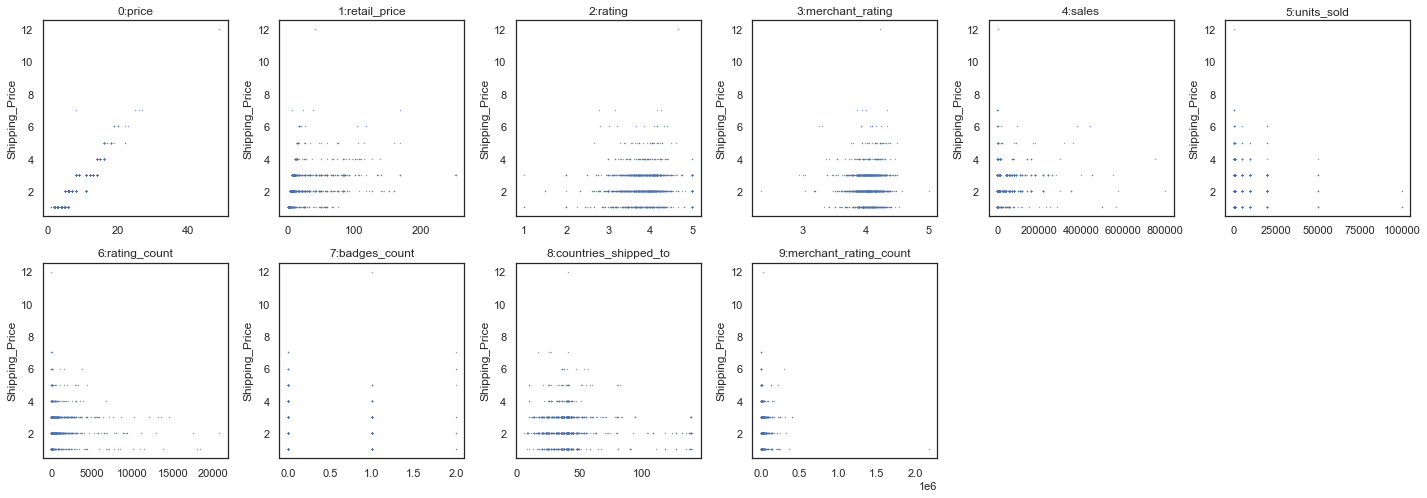

In [30]:
fig, axes = plt.subplots(3,6,figsize=(20,10))
for i, ax in enumerate (axes.ravel()):
    if i>9:
        ax.set_visible(False)
        continue
    X_col=x.iloc[:,i]
    ax.scatter(X_col,y, s=0.1)
    ax.set_ylabel("Shipping_Price")
    ax.set_title("{}:{}".format(i,x.columns[i]))
plt.tight_layout()

### *Promising variable to predict a shipping price is product price.*

In [183]:
sns.set(font_scale=1.5)
sns.set_style("white")

## Box Plots: Compare Distributions

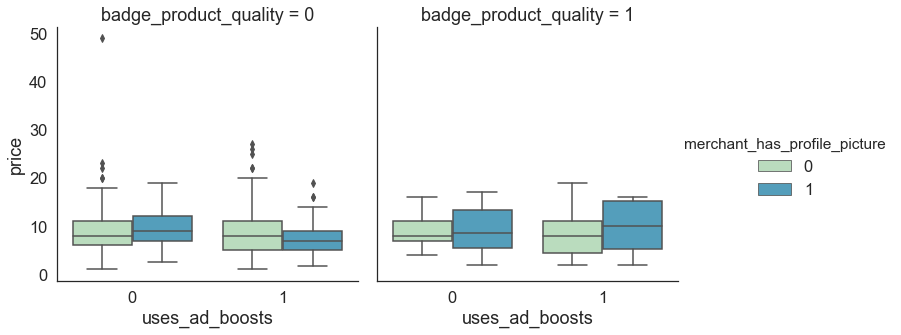

In [184]:
sns.catplot(y="price", x='uses_ad_boosts', col='badge_product_quality',hue='merchant_has_profile_picture',kind="box",data=df,palette="GnBu")

### *When the product has a quality badge, the merchant has a profile picture and using an ad boost, the mean of the product price is higher.*

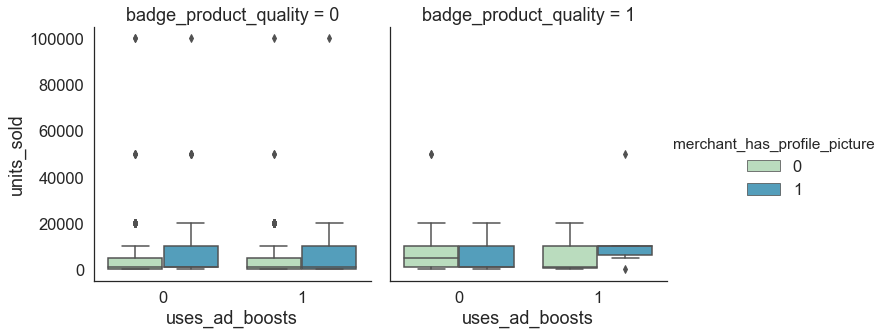

In [185]:
sns.catplot(y="units_sold", x='uses_ad_boosts', col='badge_product_quality',hue='merchant_has_profile_picture',kind="box",data=df,palette="GnBu")

### *When the product has a quality badge and the merchant has a profile picture and without using an ad boost the mean of product shipping price is higher.*

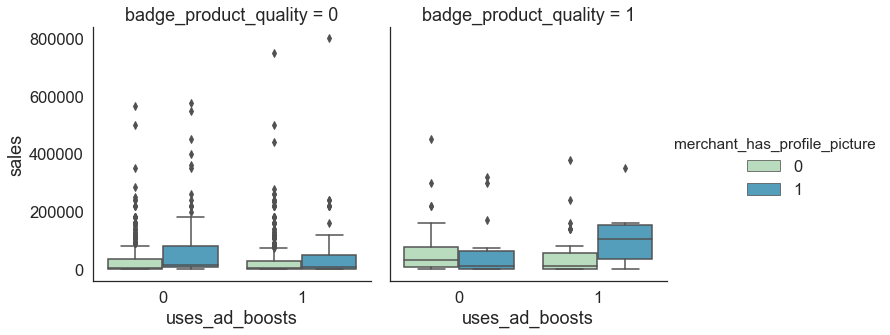

In [51]:
sns.catplot(y="sales", x='uses_ad_boosts', col='badge_product_quality',hue='merchant_has_profile_picture',kind="box",data=df,palette="GnBu")

### *Sales mean is higher when the product has a quality badge, is promoted by using an ad boost and the merchant has a profile picture .*

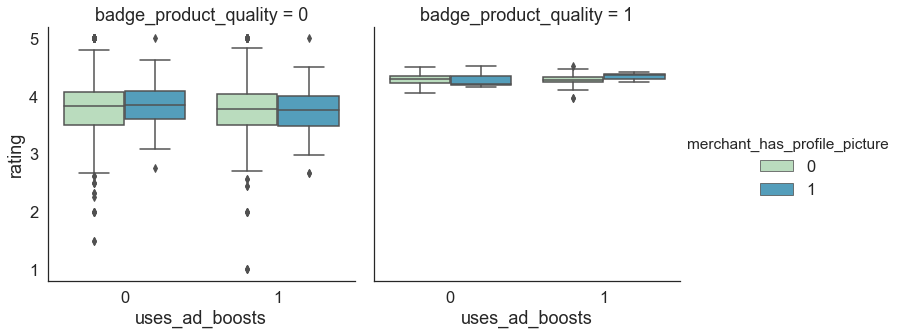

In [52]:
sns.catplot(y="rating", x='uses_ad_boosts', col='badge_product_quality',hue='merchant_has_profile_picture',kind="box",data=df,palette="GnBu")

### *When the product has a quality badge, is promoted by an ad boost and the merchant has a profile picture, product rating is higher.*

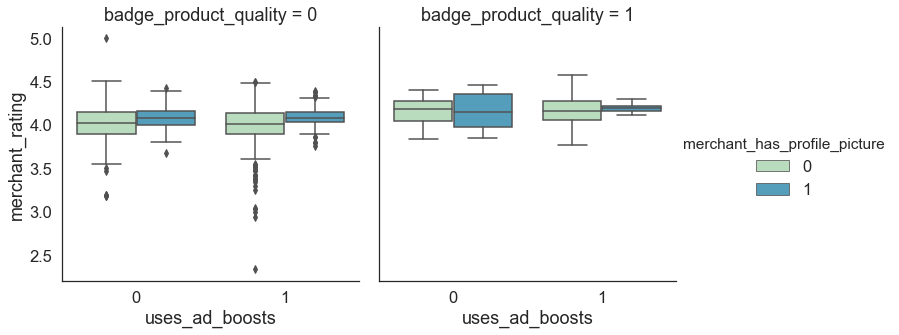

In [53]:
sns.catplot(y="merchant_rating", x='uses_ad_boosts', col='badge_product_quality',hue='merchant_has_profile_picture',kind="box",data=df,palette="GnBu")

### *When the product has a quality badge, is promoted by an ad boost and the merchant has a profile picture, merchant ratings are higher.*

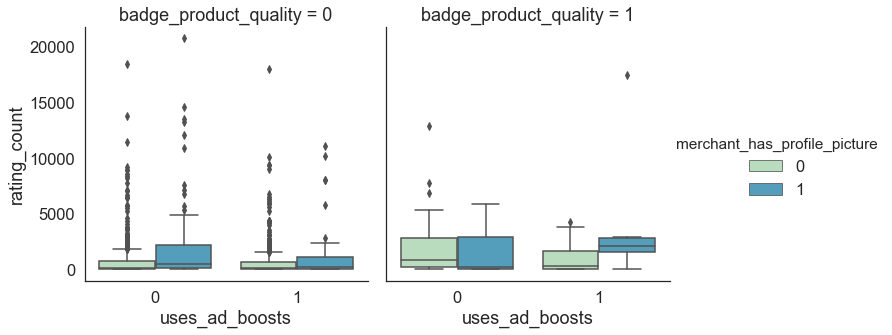

In [54]:
sns.catplot(y="rating_count", x='uses_ad_boosts', col='badge_product_quality',hue='merchant_has_profile_picture',kind="box",data=df,palette="GnBu")

### *When the product has a quality badge, is promoted by an ad boost and the merchant has a profile picture, product rating count is higher.*

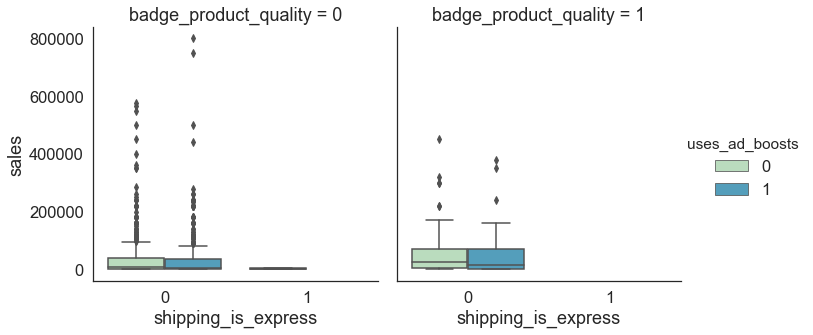

In [55]:
sns.catplot(y="sales", x='shipping_is_express', col='badge_product_quality',hue='uses_ad_boosts',kind="box",data=df,palette="GnBu")

### *Not enough data to make inferences.*

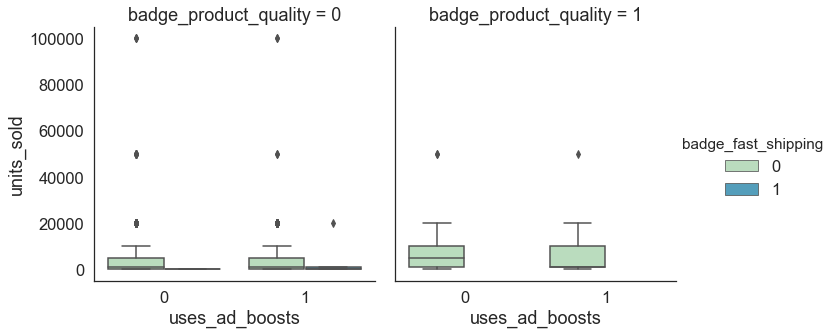

In [56]:
sns.catplot(y="units_sold", x='uses_ad_boosts', col='badge_product_quality',hue='badge_fast_shipping',kind="box",data=df,palette="GnBu")

### *Not enough data to make inferences.*

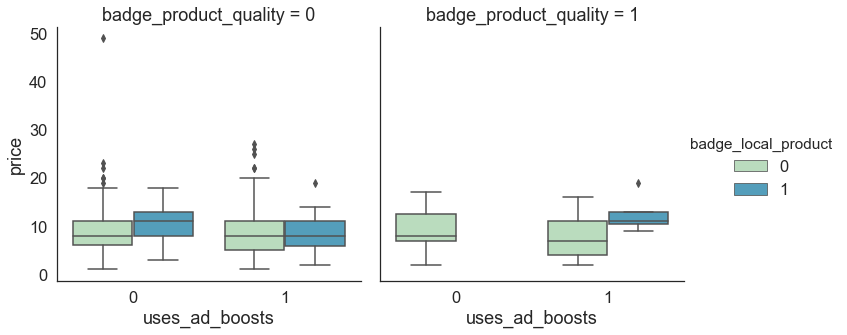

In [57]:
sns.catplot(y="price", x='uses_ad_boosts', col='badge_product_quality',hue='badge_local_product',kind="box",data=df,palette="GnBu")

### *When the product has a quality badge, has a local product badge and is using an ad boost, the product price is higher.*

# Independent Samples T Test

### Confidence interval function

In [222]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    
    std_err_1_n = math.sqrt(sample_1_var/sample_1_n)
    std_err_2_n = math.sqrt(sample_2_var/sample_2_n)
    
   # margin_of_error_1_n = 1.96 * std_err_1_n 
   # margin_of_error_2_n = 1.96 * std_err_2_n 
    
    plt.figure(figsize = (8,5))
    plt.bar(x=x1,height=[sample_1_mean,sample_2_mean],yerr=(2*std_err_1_n,2*std_err_2_n),error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2),color=['#e0f3db', '#4eb3d3'])
    plt.title('Mean of {}'.format(array_1.name))
    plt.show
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# Experiment 1: Ho: There is no a statistically significant difference in the population means regardless of whether or not they use an ad boost.

In [223]:
# Split the data for a t-test
df_num_columns=list(df_num.columns)
ad_boost = df.loc[df['uses_ad_boosts'] == 1]
no_ad_boost = df.loc[df['uses_ad_boosts'] == 0]
print(ad_boost['uses_ad_boosts'].value_counts())
print(no_ad_boost['uses_ad_boosts'].value_counts())

1    656
Name: uses_ad_boosts, dtype: int64
0    847
Name: uses_ad_boosts, dtype: int64


In [224]:
for col in df_num_columns:
    t2,p2=stats.ttest_ind(ad_boost[col], no_ad_boost[col], nan_policy='omit')
    if p2<=0.05:
        print('\nFor {}, t-statistic ={:.3f}, p-value ={:.3f}\n'.format(col,t2,p2))
    else:
        print('For {}, fail to reject the null hypothesis. The two population means are equal.'.format(col))


For price, t-statistic =-2.947, p-value =0.003

For retail_price, fail to reject the null hypothesis. The two population means are equal.
For rating, fail to reject the null hypothesis. The two population means are equal.

For shipping_option_price, t-statistic =-2.413, p-value =0.016

For merchant_rating, fail to reject the null hypothesis. The two population means are equal.
For sales, fail to reject the null hypothesis. The two population means are equal.
For units_sold, fail to reject the null hypothesis. The two population means are equal.
For rating_count, fail to reject the null hypothesis. The two population means are equal.
For badges_count, fail to reject the null hypothesis. The two population means are equal.
For countries_shipped_to, fail to reject the null hypothesis. The two population means are equal.
For merchant_rating_count, fail to reject the null hypothesis. The two population means are equal.


### *There is a statistically significant difference in PRICE between products that have ad boost and those that do not.*

### *There is a statistically significant difference in SHIPPING PRICE between products that have ad boost and those that do not.*

'The difference in means at the 95% confidence interval (two-tail) is between 0.19397298702131754 and 0.9896631606447643.'

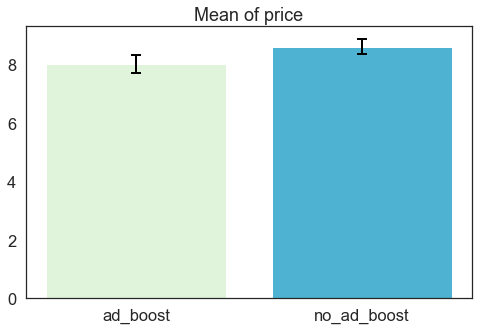

In [225]:
x1=["ad_boost","no_ad_boost"]
get_95_ci(ad_boost['price'],no_ad_boost['price'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.02240805169821751 and 0.22898495662383683.'

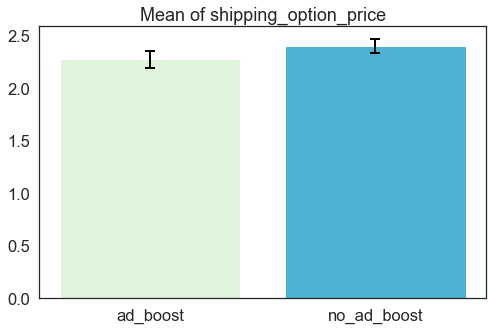

In [226]:
get_95_ci(ad_boost['shipping_option_price'],no_ad_boost['shipping_option_price'])

# Experiment 2: Ho: There is no a statistically significant difference in the population means regardless of whether or not the products have a quality product badge.

In [227]:
# Split the data for a t-test
df_num_columns=list(df_num.columns)
badge_quality = df.loc[df['badge_product_quality'] == 1]
no_badge_quality = df.loc[df['badge_product_quality'] == 0]
print(badge_quality['badge_product_quality'].value_counts())
print(no_badge_quality['badge_product_quality'].value_counts())


1    107
Name: badge_product_quality, dtype: int64
0    1396
Name: badge_product_quality, dtype: int64


In [228]:
for col in df_num_columns:
    t2,p2=stats.ttest_ind(badge_quality[col], no_badge_quality[col], nan_policy='omit')
    if p2<=0.05:
        print('\nFor {}, t-statistic ={:.3f}, p-value ={:.3f}\n'.format(col,t2,p2))
    else:
        print('For {}, fail to reject the null hypothesis. The two population means are equal.'.format(col))

For price, fail to reject the null hypothesis. The two population means are equal.
For retail_price, fail to reject the null hypothesis. The two population means are equal.

For rating, t-statistic =10.214, p-value =0.000

For shipping_option_price, fail to reject the null hypothesis. The two population means are equal.

For merchant_rating, t-statistic =7.010, p-value =0.000


For sales, t-statistic =3.824, p-value =0.000


For units_sold, t-statistic =3.008, p-value =0.003


For rating_count, t-statistic =3.789, p-value =0.000


For badges_count, t-statistic =53.195, p-value =0.000

For countries_shipped_to, fail to reject the null hypothesis. The two population means are equal.

For merchant_rating_count, t-statistic =4.587, p-value =0.000



### *There is a statistically significant difference in RATING between products that have prod. quality badge and those that do not.*

### *There is a statistically significant difference in MERCHANT RATING between products that have prod. quality badge and those that do not.*

### *There is a statistically signficant difference in SALES between products that have product quality badge and those that do not.*

### *There is a statistically signficant difference in UNITS SOLD between products that have product quality badge and those that do not.*

### *There is a statistically signficant difference in RATING COUNT between products that have product quality badge and those that do not.*

### *There is a statistically signficant difference in BADGES COUNT between products that have product quality badge and those that do not.*

### *There is a statistically signficant difference in MERCHANT RATING COUNT between products that have product quality badge and those that do not.*

'The difference in means at the 95% confidence interval (two-tail) is between -0.5454876959278789 and -0.47829052221207075.'

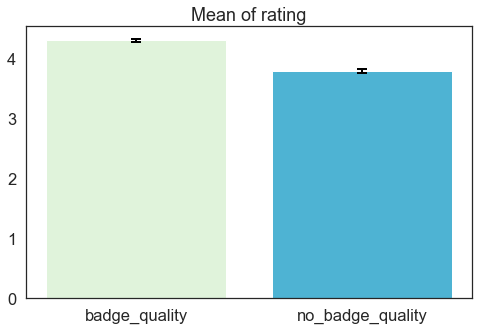

In [229]:
x1=["badge_quality","no_badge_quality"]
get_95_ci(badge_quality['rating'],no_badge_quality['rating'])

'The difference in means at the 95% confidence interval (two-tail) is between -44277.58476563304 and -9360.936169348075.'

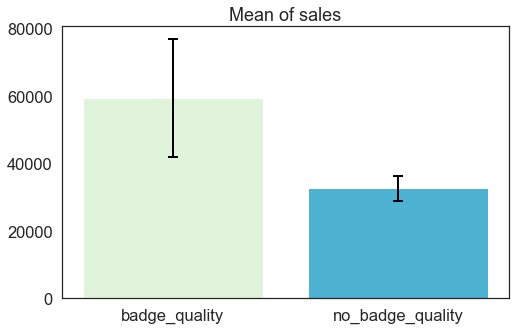

In [230]:
get_95_ci(badge_quality['sales'],no_badge_quality['sales'])

'The difference in means at the 95% confidence interval (two-tail) is between -4584.4852535314585 and -789.2191756788354.'

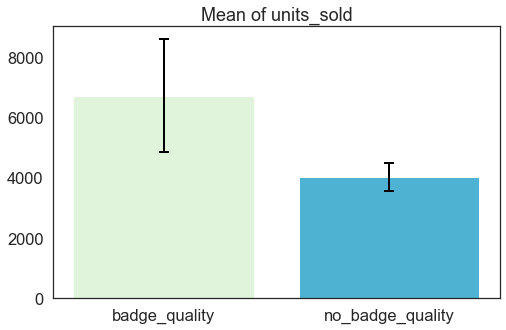

In [231]:
get_95_ci(badge_quality['units_sold'],no_badge_quality['units_sold'])

# Experiment 3: Ho: There is no a statistically significant difference in the population means regardless of whether or not the products have local product badge.

In [232]:
# Split the data for a t-test
df_num_columns=list(df_num.columns)
badge_local = df.loc[df['badge_local_product'] == 1]
no_badge_local = df.loc[df['badge_local_product'] == 0]

print(badge_local['badge_local_product'].value_counts())
print(no_badge_local['badge_local_product'].value_counts())


1    24
Name: badge_local_product, dtype: int64
0    1479
Name: badge_local_product, dtype: int64


In [233]:
for col in df_num_columns:
    t2,p2=stats.ttest_ind(badge_local[col], no_badge_local[col], nan_policy='omit')
    if p2<=0.05:
        print('\nFor {}, t-statistic ={:.3f}, p-value ={:.3f}\n'.format(col,t2,p2))
    else:
        print('For {}, fail to reject the null hypothesis. The two population means are equal.'.format(col))


For price, t-statistic =1.976, p-value =0.048

For retail_price, fail to reject the null hypothesis. The two population means are equal.
For rating, fail to reject the null hypothesis. The two population means are equal.

For shipping_option_price, t-statistic =2.223, p-value =0.026


For merchant_rating, t-statistic =4.533, p-value =0.000

For sales, fail to reject the null hypothesis. The two population means are equal.
For units_sold, fail to reject the null hypothesis. The two population means are equal.
For rating_count, fail to reject the null hypothesis. The two population means are equal.

For badges_count, t-statistic =24.771, p-value =0.000

For countries_shipped_to, fail to reject the null hypothesis. The two population means are equal.
For merchant_rating_count, fail to reject the null hypothesis. The two population means are equal.


### *The badge local product sample wasn't enough to validate the hypothesis, but it looks like price, shipping price, merchant ratings, and badge count are factors that drive local product badges.*

'The difference in means at the 95% confidence interval (two-tail) is between -0.23147772025990077 and -0.14418905439791163.'

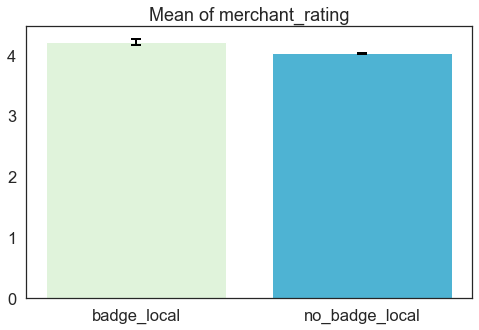

In [234]:
x1=["badge_local","no_badge_local"]
get_95_ci(badge_local['merchant_rating'],no_badge_local['merchant_rating'])

# Experiment 4: Ho: There is no a statistically significant difference in the population means regardless of whether or not the merchant has a profile picture.

In [235]:
# Split the data for a t-test
df_num_columns=list(df_num.columns)
merchant_picture = df.loc[df['merchant_has_profile_picture'] == 1]
no_merchant_picture= df.loc[df['merchant_has_profile_picture'] == 0]
print(mechant_picture['merchant_has_profile_picture'].value_counts())
print(no_merchant_picture['merchant_has_profile_picture'].value_counts())


1    215
Name: merchant_has_profile_picture, dtype: int64
0    1288
Name: merchant_has_profile_picture, dtype: int64


In [236]:
for col in df_num_columns:
    t2,p2=stats.ttest_ind(mechant_picture[col], no_merchant_picture[col], nan_policy='omit')
    if p2<=0.05:
        print('\nFor {}, t-statistic ={:.3f}, p-value ={:.3f}\n'.format(col,t2,p2))
    else:
        print('For {}, fail to reject the null hypothesis. The two population means are equal.'.format(col))

For price, fail to reject the null hypothesis. The two population means are equal.
For retail_price, fail to reject the null hypothesis. The two population means are equal.
For rating, fail to reject the null hypothesis. The two population means are equal.
For shipping_option_price, fail to reject the null hypothesis. The two population means are equal.

For merchant_rating, t-statistic =4.906, p-value =0.000


For sales, t-statistic =6.028, p-value =0.000


For units_sold, t-statistic =5.329, p-value =0.000


For rating_count, t-statistic =5.939, p-value =0.000

For badges_count, fail to reject the null hypothesis. The two population means are equal.
For countries_shipped_to, fail to reject the null hypothesis. The two population means are equal.

For merchant_rating_count, t-statistic =4.637, p-value =0.000



### *There is a statistically significant difference in MERCHANT RATING between products that have a merchant profile picture and those that do not.*

### *There is a statistically significant difference in SALES between products that have a merchant profile picture and those that do not.*

### *There is a statistically significant difference in UNITS SOLD between products that have a merchant profile picture and those that do not.*

### *There is a statistically significant difference in RATING COUNTS between products that have a merchant profile picture and those that do not.*

### *There is a statistically significant difference in MERCHANT RATING COUNTS between products that have a merchant profile picture and those that do not.*

'The difference in means at the 95% confidence interval (two-tail) is between -45761.66001840508 and -15898.459545006745.'

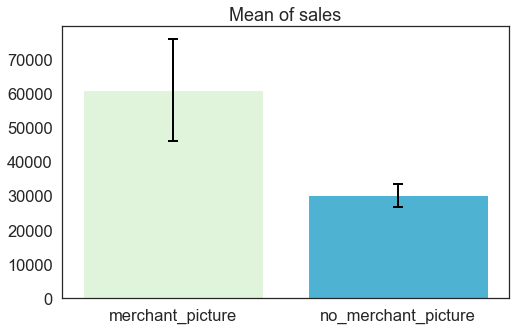

In [237]:
x1=["merchant_picture","no_merchant_picture"]
get_95_ci(merchant_picture['sales'],no_merchant_picture['sales'])

'The difference in means at the 95% confidence interval (two-tail) is between -5302.28756365536 and -1645.76448025624.'

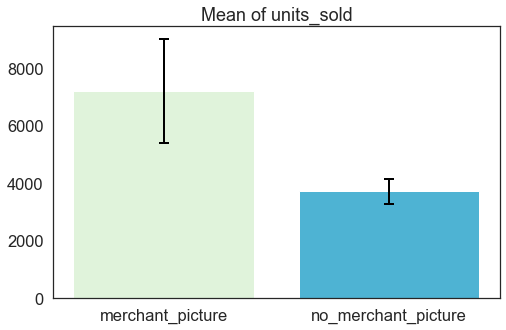

In [238]:
get_95_ci(merchant_picture['units_sold'],no_merchant_picture['units_sold'])

'The difference in means at the 95% confidence interval (two-tail) is between -1242.5020415022314 and -405.49139342482334.'

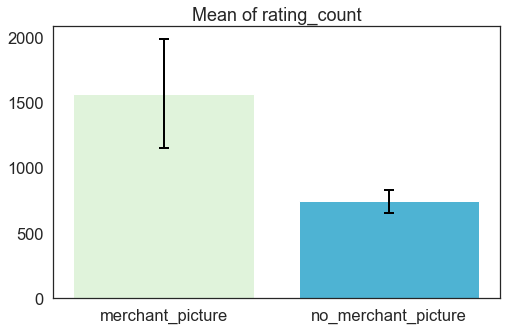

In [239]:
get_95_ci(merchant_picture['rating_count'],no_merchant_picture['rating_count'])

'The difference in means at the 95% confidence interval (two-tail) is between -32400.496864331 and -14726.441695541886.'

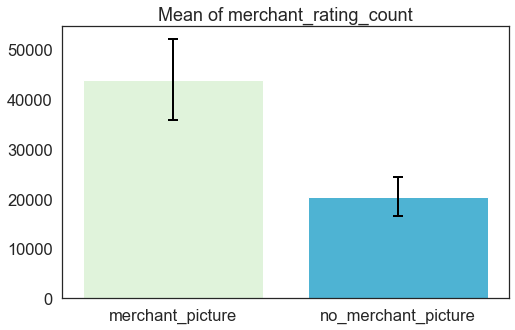

In [240]:
get_95_ci(merchant_picture['merchant_rating_count'],no_merchant_picture['merchant_rating_count'])

# Experiment 5: Ho: There is no a statistically significant difference in the population proportion regardless of whether or not the product is local.

In [241]:
# Split the data for a t-test
local_badge = df.loc[df['badge_local_product'] == 1]
no_local_badge= df.loc[df['badge_local_product'] == 0]


t2,p2=stests.ztest(local_badge['uses_ad_boosts'], no_local_badge['uses_ad_boosts'], value=0,alternative='two-sided')
if p2<=0.05:
     print('z-statistic ={:.3f}, p-value ={:.3f}\n'.format(t2,p2))
else:
    print('Fail to reject the null hypothesis. The two population means are equal.')

z-statistic =2.712, p-value =0.007



The difference in means at the 95% confidence interval (two-tail) is between 0.06918883384915686 and 0.48338046973434556.


639

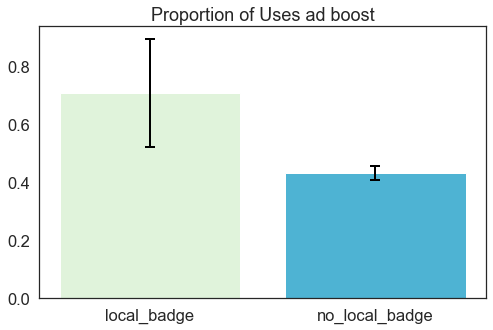

In [259]:
    count_1 = local_badge.shape[0]
    count_2 = no_local_badge.shape[0]
    sample_1_sum = local_badge['uses_ad_boosts'].sum()
    sample_2_sum = no_local_badge['uses_ad_boosts'].sum()
 
    
    prop_1 = sample_1_sum/count_1
    prop_2 = sample_2_sum/count_2
    
    std_err_1_n = math.sqrt((prop_1*(1-prop_1))/count_1)
    std_err_2_n = math.sqrt((prop_2*(1-prop_2))/count_2)
    
   # margin_of_error_1_n = 1.96 * std_err_1_n 
   # margin_of_error_2_n = 1.96 * std_err_2_n 
    x1=['local_badge','no_local_badge']
    
    mean_difference = prop_1 - prop_2
    std_err_difference = std_err_1_n + std_err_2_n
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    
    print("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    
    plt.figure(figsize = (8,5))
    plt.bar(x=x1,height=[prop_1,prop_2],yerr=(2*std_err_1_n,2*std_err_2_n),error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2),
            color=['#e0f3db', '#4eb3d3'])
    plt.title('Proportion of Uses ad boost')
    
    #margin_of_error
   # mean_difference
    sample_1_sum
    sample_2_sum

### *Result: Even though there is not enough sample to validate the hypothesis, it looks like merchant uses ad boosts when products are local.*

In [245]:
prop_2

0.43204868154158216

### Conclusions

Wish's busines model consists of 3 income streams: Sales, Advertisement and Logistic Services. The data extracted relates to the two first activities.
    
*For Sales:*
    
Units sold and rating counts are discrete variables that show a strong relationship with sales.

To increase units sold and rating counts, the product should have a quality badge and the merchant a profile picture.

Besides, sales mean is higher when the product has a quality badge, is promoted by using an ad boost and the merchant has a profile picture.

Product rating is not product rating count. The first shows a Pearson R of 0.06 when corralared with Sales, the latter has a strong correlation of 0.83.

Product rating is strong correlated to Merchant Rating, but sales are not driven by product rating.

When the product has a quality badge, has a local product badge and is using an ad boost, the mean of product price is higher. However, product price is not a strong predictor of sales.


*For Ad Boost:*

To test hypothesis for this binary variable, it was performed a z-test. However, there wasn't enough data to validate the only experiment that got a p-value lower than 0.05, but it looks like merchant uses ad boosts when products are local.

